# Data and Machine Learning Exploration on College Basketball Data
This juypter notebook is my exploration and inital attempts at using machine learning to predict march madness tournament games. The data comes from https://barttorvik.com/trank.php?#. It provides various metrics on team performance from offensive and defensive effciencies, free throw rate, 2 point shooting percentage, and other various measures of a team's performance. Not all metrics were provided in the csvs Bart Torvik's site provides. Metrics I collected from the site on top of the data provided was the rating of each team's top player and how many players have a significant rating. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ncaa-tourney-training-data/MVConfData.csv
/kaggle/input/ncaa-tourney-training-data/TourneyPredictorTrainingData.csv
/kaggle/input/ncaa-tourney-training-data/MAAConfData.csv
/kaggle/input/ncaa-tourney-training-data/TourneyFullData.csv
/kaggle/input/ncaa-tourney-training-data/WAConfData.csv
/kaggle/input/ncaa-tourney-training-data/SLandConfData.csv
/kaggle/input/ncaa-tourney-training-data/ACConfData.csv
/kaggle/input/ncaa-tourney-training-data/test2015.csv
/kaggle/input/ncaa-tourney-training-data/B12ConfData.csv
/kaggle/input/ncaa-tourney-training-data/MAConfData.csv
/kaggle/input/ncaa-tourney-training-data/Test2016.csv
/kaggle/input/ncaa-tourney-training-data/BEastConfData.csv
/kaggle/input/ncaa-tourney-training-data/Fieldof682023.csv
/kaggle/input/ncaa-tourney-training-data/OVConfData.csv
/kaggle/input/ncaa-tourney-training-data/SEConfData.csv
/kaggle/input/ncaa-tourney-training-data/IVYConfData.csv
/kaggle/input/ncaa-tourney-training-data/NEConfData.csv
/kaggle/input/nca

In [2]:
# import all of the python modules/packages you'll need here
import matplotlib.pyplot as plt
import statistics
from sklearn.metrics import mean_squared_error
# ...

# Data Visualization
This section is used to visualize possible relationships between the individual metrics and each team's advance score. I am looking for trends to identify significant relationships.

In [3]:
df = pd.read_csv('../input/ncaa-tourney-training-data/TourneyPredictorTrainingData.csv')
df

,Team,ADJOE,ADJDE,BARTHAG,W,G,EFG,EFGd,FTR,FTRD,...,2Pper,2PperD,3Pper,3PperD,ADJTEMP,Yr,WAB,BestPlyr,SigWARPlyr,AdvScore
0,Indiana,107.973,90.507,0.8838,20,33,51.3,45.6,33.5,30.6,...,51.4,43.4,33.9,32.6,68.2,2022,0.2242,5.2,3,0
1,Wright St.,104.209,106.863,0.4282,20,33,52.0,51.2,31.1,26.0,...,53.2,51.6,33.0,33.7,69.6,2022,-8.3947,4.3,3,0
2,UAB,111.104,98.065,0.8078,25,32,52.9,47.9,29.5,31.5,...,50.6,47.5,38.3,32.4,69.9,2022,-0.1033,4.7,4,0
3,Villanova,117.142,92.968,0.9345,26,33,52.0,47.5,30.5,25.1,...,50.3,48.2,35.9,31.0,63.6,2022,7.2884,5.7,6,15
4,Arizona,118.039,92.430,0.9433,31,34,55.9,44.4,35.1,22.8,...,57.5,41.9,35.4,32.7,73.4,2022,8.7612,4.6,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,North Carolina Central,101.818,100.759,0.5300,22,30,51.8,45.1,34.8,27.6,...,53.0,45.9,33.3,29.1,67.9,2017,-4.9820,2.9,2,-1
336,Arkansas,115.356,101.139,0.8194,25,34,51.5,48.2,38.8,39.3,...,50.2,47.2,36.4,33.2,70.9,2017,3.8886,3.7,5,1
337,Dayton,110.492,96.542,0.8252,23,30,54.2,47.7,43.7,34.6,...,51.8,47.2,38.7,32.4,69.8,2017,1.5564,3.6,5,0
338,USC,111.201,99.606,0.7801,24,33,51.9,49.7,37.2,23.9,...,50.5,46.8,36.3,36.5,70.5,2017,1.3601,4.0,4,1


In [4]:
df['AdvScore'].unique()

array([ 0, 15,  3,  1, -1,  7, 63, 31])

In [5]:
df['Team'].unique().size

163

In [6]:
df['Team'].unique()

array(['Indiana', 'Wright St.', 'UAB', 'Villanova', 'Arizona', 'LSU',
       'Baylor', 'Marquette', 'Richmond', 'Providence', 'Davidson',
       'Akron', 'Memphis', 'Murray St.', 'Notre Dame', 'Creighton',
       'Duke', 'UCLA', 'Norfolk St.', 'Chattanooga', 'Yale', 'Tennessee',
       'Wyoming', 'Illinois', 'Loyola Chicago', 'Texas', 'San Diego St.',
       'Montana St.', 'Michigan', 'Texas Southern', 'Auburn',
       "Saint Peter's", 'Kentucky', 'Wisconsin', 'Alabama', 'Kansas',
       'Michigan St.', 'Cal St. Fullerton', 'Colorado St.', 'Iowa', 'TCU',
       "Saint Mary's", 'Texas A&M Corpus Chris', 'Ohio St.', 'Seton Hall',
       'North Carolina', 'Delaware', 'Georgia St.', 'Miami FL',
       'Iowa St.', 'Vermont', 'Purdue', 'Houston', 'New Mexico St.',
       'San Francisco', 'Connecticut', 'South Dakota St.', 'Texas Tech',
       'Gonzaga', 'Bryant', 'Jacksonville St.', 'Virginia Tech',
       'Arkansas', 'Rutgers', 'Colgate', 'USC', 'Longwood', 'Boise St.',
       'UC Santa Bar

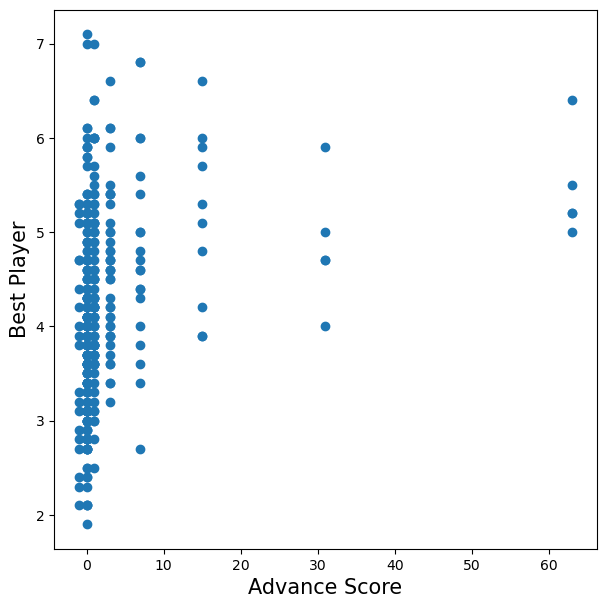

In [7]:
plt.figure(figsize=(7,7))
plt.scatter(df.AdvScore, df.BestPlyr)
plt.xlabel("Advance Score", fontsize=15)
plt.ylabel("Best Player", fontsize=15);

This plot looks at the advance score plotted with the highest rated PRPG! player.

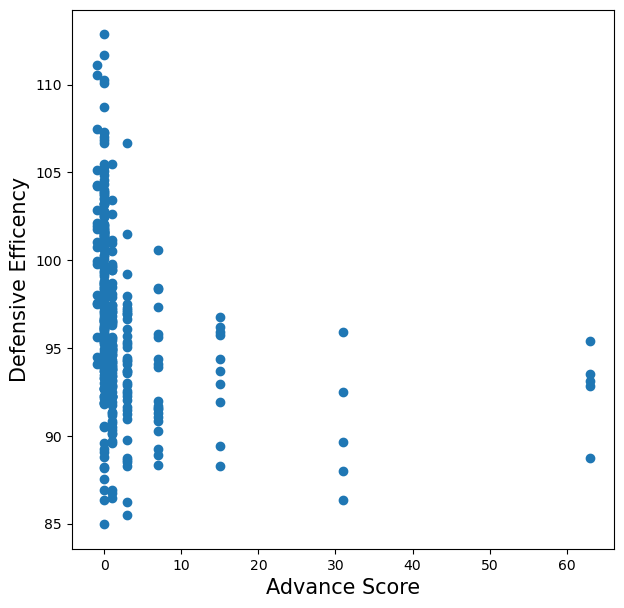

In [8]:
plt.figure(figsize=(7,7))
plt.scatter(df.AdvScore, df.ADJDE)
plt.xlabel("Advance Score", fontsize=15)
plt.ylabel("Defensive Efficency", fontsize=15);

This plot looks at the advance score plotted with each team's adjusted defensive efficiency.

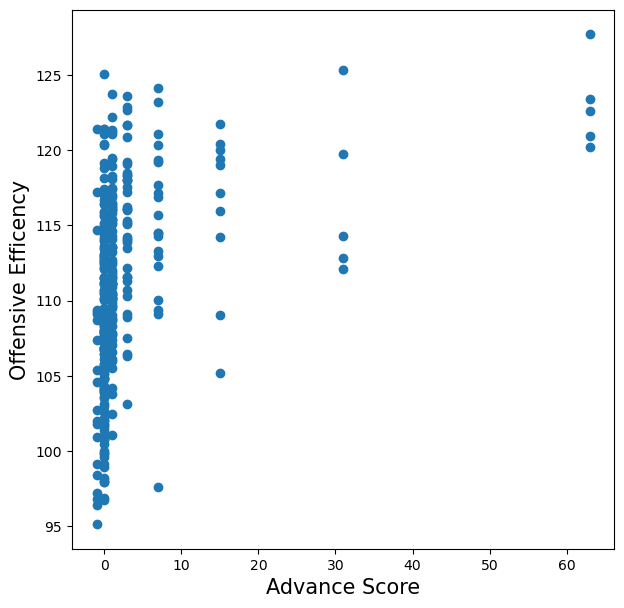

In [9]:
plt.figure(figsize=(7,7))
plt.scatter(df.AdvScore, df.ADJOE)
plt.xlabel("Advance Score", fontsize=15)
plt.ylabel("Offensive Efficency", fontsize=15);

This plot looks at the advance score plotted with each team's offensive efficiency.

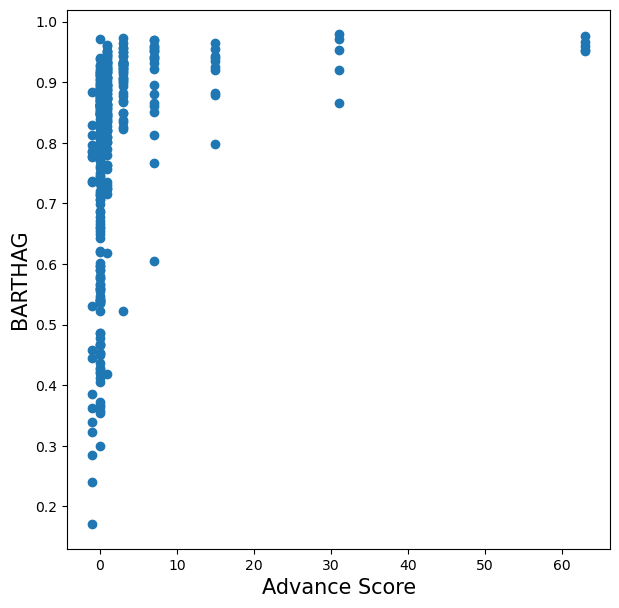

In [10]:
plt.figure(figsize=(7,7))
plt.scatter(df.AdvScore, df.BARTHAG)
plt.xlabel("Advance Score", fontsize=15)
plt.ylabel("BARTHAG", fontsize=15);

This plot looks at the advance score plotted with each team's BARTHAG rating. The BARTHAG rating is the probability that a given team beats an average division I opponent.

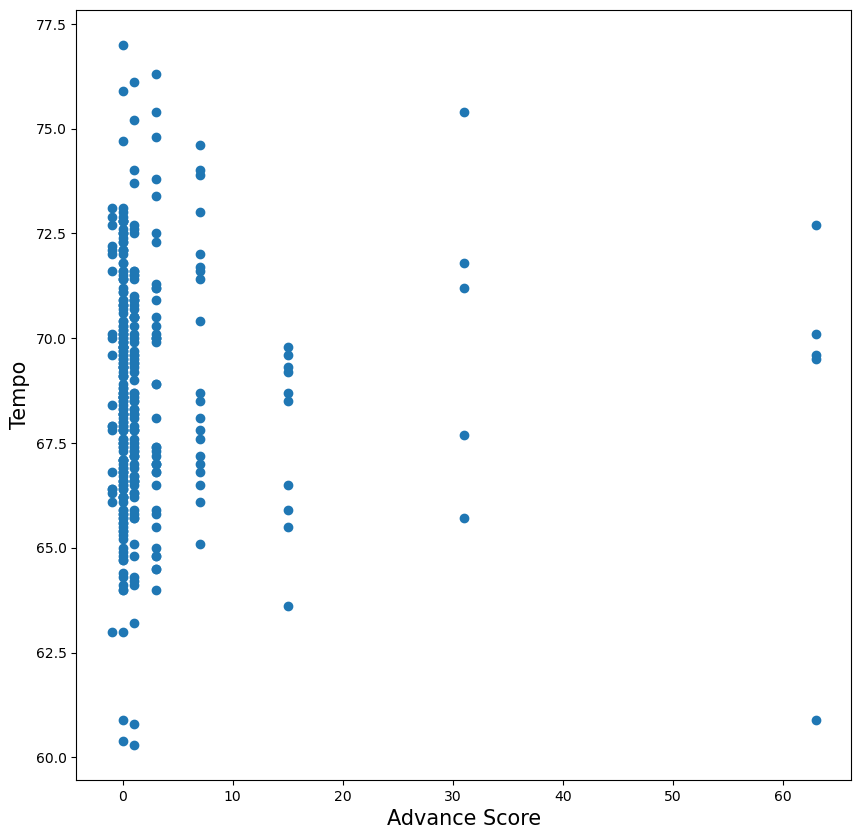

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(df.AdvScore, df.ADJTEMP)
plt.xlabel("Advance Score", fontsize=15)
plt.ylabel("Tempo", fontsize=15);

This plot looks at the advance score plotted with the adjusted tempo.

**Conclusions** \
The most clear correlations come from the advance score paired with BARTHAG and defensive efficiency. This will be an important to consider when looking at the coefficient weighting when training and testing machine learning models. 

# Machine Learning

In [12]:
#Test Team: Alabama, Iowa St., Oral Roberts, Hawaii
bama = np.array([[118.8, 90.1, .9603, 23, 27, 53.8, 41.1, 38.2, 32.9, 19, 15.8, 33, 27.7, 54, 41.9, 35.7, 26.4, 73.6, 7.8, 5.2, 3],
                [110.4, 90.6, .9067, 17, 26, 51.1, 48.9, 27.2, 41.1, 19.4, 25.7, 33.3, 26.4, 51.2, 49.3, 34, 32.2, 65, 2.8, 3.1, 6],
                [113.2, 102.6, .7550, 25, 29, 56.6, 48.8, 23.9, 22.9, 13.7, 17.5, 24.2, 26.5, 56.7, 46.8, 37.7, 34.6, 71.3, 1.4, 5.6, 4],
                [102.1, 98.6, .5973, 20, 28, 48.8, 44.3, 34.2, 28.3, 18.7, 17.5, 30.5, 27.3, 48.9, 44.8, 32.5, 28.6, 65, -3.4, 2.2, 2]])

In [13]:
traindf = df.copy()
traindf

,Team,ADJOE,ADJDE,BARTHAG,W,G,EFG,EFGd,FTR,FTRD,...,2Pper,2PperD,3Pper,3PperD,ADJTEMP,Yr,WAB,BestPlyr,SigWARPlyr,AdvScore
0,Indiana,107.973,90.507,0.8838,20,33,51.3,45.6,33.5,30.6,...,51.4,43.4,33.9,32.6,68.2,2022,0.2242,5.2,3,0
1,Wright St.,104.209,106.863,0.4282,20,33,52.0,51.2,31.1,26.0,...,53.2,51.6,33.0,33.7,69.6,2022,-8.3947,4.3,3,0
2,UAB,111.104,98.065,0.8078,25,32,52.9,47.9,29.5,31.5,...,50.6,47.5,38.3,32.4,69.9,2022,-0.1033,4.7,4,0
3,Villanova,117.142,92.968,0.9345,26,33,52.0,47.5,30.5,25.1,...,50.3,48.2,35.9,31.0,63.6,2022,7.2884,5.7,6,15
4,Arizona,118.039,92.430,0.9433,31,34,55.9,44.4,35.1,22.8,...,57.5,41.9,35.4,32.7,73.4,2022,8.7612,4.6,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,North Carolina Central,101.818,100.759,0.5300,22,30,51.8,45.1,34.8,27.6,...,53.0,45.9,33.3,29.1,67.9,2017,-4.9820,2.9,2,-1
336,Arkansas,115.356,101.139,0.8194,25,34,51.5,48.2,38.8,39.3,...,50.2,47.2,36.4,33.2,70.9,2017,3.8886,3.7,5,1
337,Dayton,110.492,96.542,0.8252,23,30,54.2,47.7,43.7,34.6,...,51.8,47.2,38.7,32.4,69.8,2017,1.5564,3.6,5,0
338,USC,111.201,99.606,0.7801,24,33,51.9,49.7,37.2,23.9,...,50.5,46.8,36.3,36.5,70.5,2017,1.3601,4.0,4,1


In [14]:
traindf = traindf.drop(columns = ['Team', 'Yr']);
traindf

,ADJOE,ADJDE,BARTHAG,W,G,EFG,EFGd,FTR,FTRD,TOR,...,DRB,2Pper,2PperD,3Pper,3PperD,ADJTEMP,WAB,BestPlyr,SigWARPlyr,AdvScore
0,107.973,90.507,0.8838,20,33,51.3,45.6,33.5,30.6,17.3,...,25.0,51.4,43.4,33.9,32.6,68.2,0.2242,5.2,3,0
1,104.209,106.863,0.4282,20,33,52.0,51.2,31.1,26.0,17.9,...,30.0,53.2,51.6,33.0,33.7,69.6,-8.3947,4.3,3,0
2,111.104,98.065,0.8078,25,32,52.9,47.9,29.5,31.5,16.3,...,27.4,50.6,47.5,38.3,32.4,69.9,-0.1033,4.7,4,0
3,117.142,92.968,0.9345,26,33,52.0,47.5,30.5,25.1,15.5,...,28.0,50.3,48.2,35.9,31.0,63.6,7.2884,5.7,6,15
4,118.039,92.430,0.9433,31,34,55.9,44.4,35.1,22.8,18.0,...,28.3,57.5,41.9,35.4,32.7,73.4,8.7612,4.6,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,101.818,100.759,0.5300,22,30,51.8,45.1,34.8,27.6,17.9,...,31.4,53.0,45.9,33.3,29.1,67.9,-4.9820,2.9,2,-1
336,115.356,101.139,0.8194,25,34,51.5,48.2,38.8,39.3,16.4,...,33.5,50.2,47.2,36.4,33.2,70.9,3.8886,3.7,5,1
337,110.492,96.542,0.8252,23,30,54.2,47.7,43.7,34.6,17.1,...,27.0,51.8,47.2,38.7,32.4,69.8,1.5564,3.6,5,0
338,111.201,99.606,0.7801,24,33,51.9,49.7,37.2,23.9,15.7,...,31.2,50.5,46.8,36.3,36.5,70.5,1.3601,4.0,4,1


Variables are classified using the code below. The test data used in the following sections is from the 2016 season which is outside of the test data which is trained on the last 5 march madness tournaments.

In [15]:
x = traindf.iloc[:,:-1].values
y = traindf.iloc[:,-1].values

In [16]:
test = pd.read_csv('../input/ncaa-tourney-training-data/Test2016.csv')
testTeams = test.iloc[:,0]
testResults = test.iloc[:,-1]

In [17]:
test = test.drop(columns = ['Team', 'Yr']);
testData = test.iloc[:,:-1].values
testData

array([[120.087 ,  98.031 ,   0.9116, ...,   3.2998,   5.8   ,   7.    ],
       [117.122 ,  94.528 ,   0.9216, ...,   7.73  ,   3.8   ,   6.    ],
       [118.91  ,  90.384 ,   0.9591, ...,   8.9556,   4.5   ,   6.    ],
       ...,
       [115.241 ,  97.339 ,   0.8745, ...,   5.675 ,   5.4   ,   4.    ],
       [111.523 ,  90.325 ,   0.9187, ...,   0.2834,   3.6   ,   3.    ],
       [112.447 ,  98.543 ,   0.8202, ...,   1.2542,   3.8   ,   6.    ]])

**Linear Regression Model**

In [18]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x, y)
reg.coef_

array([ 1.49032086e+00, -1.43567116e+00, -6.55608314e+01,  2.49122488e-01,
       -1.80069028e-01,  6.96178668e-01, -2.96490128e+00, -1.19662507e-01,
        2.35663005e-02,  3.24196594e-01,  1.39743947e-01, -5.44388112e-02,
       -6.52288172e-02, -5.32185938e-01,  2.20842959e+00, -3.06550396e-01,
        1.55098071e+00,  5.40730653e-03,  1.83244636e-01,  1.15335385e-01,
       -4.71641661e-01])

In [19]:
regPreds = reg.predict(testData)
table1 = pd.DataFrame({'teams':testTeams, 'Actual':testResults, 'Predictions':regPreds, 'Differnce':(testResults - regPreds)})
pd.set_option('display.max_rows', None)
table1

,teams,Actual,Predictions,Differnce
0,Indiana,3,7.296158,-4.296158
1,Xavier,1,7.047599,-6.047599
2,Villanova,63,11.592414,51.407586
3,Maryland,3,2.194949,0.805051
4,Arizona,0,2.925575,-2.925575
5,Hawaii,1,-2.549796,3.549796
6,Fresno St.,0,-1.324150,1.324150
7,Baylor,0,2.881315,-2.881315
8,Weber St.,0,-0.689104,0.689104
9,Kansas,7,15.245764,-8.245764


**Bayesian Ridge Prediction Model**

In [20]:
bay = linear_model.BayesianRidge()
bay.fit(x,y)
bay.coef_

array([ 0.23647511, -0.09262489, -0.00929986,  0.115362  , -0.05230843,
        0.09178218, -0.04771636, -0.06037631, -0.03239277,  0.0025837 ,
        0.11743912,  0.10707993,  0.0393229 ,  0.05448615,  0.03190894,
        0.0833718 , -0.10485273, -0.00044442,  0.16603072,  0.03704898,
       -0.01862687])

In [21]:
bayPreds = bay.predict(testData)
table2 = pd.DataFrame({'teams':testTeams, 'Actual':testResults, 'Predictions':bayPreds, 'Differnce':(testResults - bayPreds)})
table2

,teams,Actual,Predictions,Differnce
0,Indiana,3,7.227855,-4.227855
1,Xavier,1,5.694312,-4.694312
2,Villanova,63,7.102304,55.897696
3,Maryland,3,4.657961,-1.657961
4,Arizona,0,4.486198,-4.486198
5,Hawaii,1,1.316125,-0.316125
6,Fresno St.,0,-0.553169,0.553169
7,Baylor,0,4.153312,-4.153312
8,Weber St.,0,-1.802727,1.802727
9,Kansas,7,8.315847,-1.315847


**Lasso Lars Predictions Model**

In [22]:
lars = linear_model.LassoLars(alpha=.0001)
lars.fit(x,y)
lars.coef_

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


array([ 1.47774726e+00, -1.42595844e+00, -6.52902676e+01,  2.36928141e-01,
       -1.73008390e-01,  4.32350865e-01, -2.56251438e+00, -1.18903680e-01,
        2.17448928e-02,  3.13936406e-01,  1.41302511e-01, -5.02859091e-02,
       -6.07558459e-02, -3.57166338e-01,  1.95092101e+00, -1.49614999e-01,
        1.32378054e+00,  2.21273032e-03,  1.92849122e-01,  1.15214900e-01,
       -4.68028683e-01])

In [23]:
larsPreds = lars.predict(testData)
table3 = pd.DataFrame({'teams':testTeams, 'Actual':testResults, 'Predictions':larsPreds, 'Differnce':(testResults - larsPreds)})
table3

,teams,Actual,Predictions,Differnce
0,Indiana,3,7.186295,-4.186295
1,Xavier,1,6.994673,-5.994673
2,Villanova,63,11.657780,51.342220
3,Maryland,3,2.245202,0.754798
4,Arizona,0,2.971499,-2.971499
5,Hawaii,1,-2.567330,3.567330
6,Fresno St.,0,-1.232711,1.232711
7,Baylor,0,2.922620,-2.922620
8,Weber St.,0,-0.967498,0.967498
9,Kansas,7,15.228739,-8.228739


**K Nearest Neighbors Model**

In [24]:
from sklearn import neighbors
n_neighbors = 20

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    nnPreds = knn.fit(x, y).predict(testData)
table4 = pd.DataFrame({'teams':testTeams, 'Actual':testResults, 'Predictions': nnPreds, 'Differnce':(testResults - nnPreds)})
table4

,teams,Actual,Predictions,Differnce
0,Indiana,3,5.456788,-2.456788
1,Xavier,1,6.138347,-5.138347
2,Villanova,63,12.481208,50.518792
3,Maryland,3,1.951159,1.048841
4,Arizona,0,2.155443,-2.155443
5,Hawaii,1,0.934693,0.065307
6,Fresno St.,0,1.084327,-1.084327
7,Baylor,0,1.441439,-1.441439
8,Weber St.,0,0.091648,-0.091648
9,Kansas,7,6.964947,0.035053


In [25]:
knn.predict(bama)

array([8.5217879 , 0.94503397, 0.74407344, 0.07218109])

In [26]:
Kstring = "K nearest neighbors: " + str(mean_squared_error(testResults, nnPreds))
Lstring = "Linear Regression: " + str(mean_squared_error(testResults, regPreds))
Bstring = "Bayesian Ridge: " + str(mean_squared_error(testResults, bayPreds))
LAstring = "Lasso Lars: " + str(mean_squared_error(testResults, larsPreds))
print("Means Square Error Results")
print(Kstring)
print(Lstring)
print(Bstring)
print(LAstring)

Means Square Error Results
K nearest neighbors: 52.30897316408484
Linear Regression: 61.366033214481924
Bayesian Ridge: 65.93860256577625
Lasso Lars: 61.4127736219434


# Test set 2
This test is done using the a 2015 dataset 

In [27]:
test2 = pd.read_csv('../input/ncaa-tourney-training-data/test2015.csv')
test2Teams = test2.iloc[:,0]
test2Results = test2.iloc[:,-1]

In [28]:
test2 = test2.drop(columns = ['Team', 'Yr']);
test2Data = test2.iloc[:,:-1].values
test2Data

array([[118.924 , 103.431 ,   0.8327, ...,  -0.373 ,   5.7   ,   5.    ],
       [113.291 ,  97.294 ,   0.852 , ...,   1.0337,   4.7   ,   3.    ],
       [105.029 ,  97.271 ,   0.7073, ...,  -4.3139,   3.1   ,   2.    ],
       ...,
       [115.121 ,  88.865 ,   0.9515, ...,   3.6546,   5.8   ,   4.    ],
       [114.096 ,  91.693 ,   0.9251, ...,   4.4218,   4.9   ,   4.    ],
       [109.506 ,  97.09  ,   0.7996, ...,   0.4686,   4.8   ,   5.    ]])

In [29]:
nnPreds2 = knn.predict(test2Data)
table5 = pd.DataFrame({'teams':test2Teams, 'Actual':test2Results, 'Predictions': nnPreds2, 'Differnce':(test2Results - nnPreds2)})
print(table5)
print("Mean Squared Error: " +  str(mean_squared_error(test2Results, nnPreds2)))

                 teams  Actual  Predictions  Differnce
0              Indiana       0     0.937886  -0.937886
1   North Carolina St.       3     0.814999   2.185001
2            UC Irvine       0     0.395771  -0.395771
3                  UAB       1     0.323761   0.676239
4                  BYU      -1     1.004464  -2.004464
5               Xavier       3     1.485795   1.514205
6         Northeastern       0    -0.003164   0.003164
7        Robert Morris       0     0.214445  -0.214445
8            Villanova       1    11.353263 -10.353263
9             Maryland       1     2.000709  -1.000709
10             Arizona       7     5.650605   1.349395
11                 LSU       0     0.686732  -0.686732
12              Baylor       0     2.293166  -2.293166
13              Kansas       1     2.573090  -1.573090
14                 SMU       0     2.469236  -2.469236
15          Providence       0     1.869882  -1.869882
16          Louisville       7     3.266824   3.733176
17        

In [30]:
bayPreds2 = bay.predict(test2Data)
table6 = pd.DataFrame({'teams':test2Teams, 'Actual':test2Results, 'Predictions':bayPreds2, 'Differnce':(test2Results - bayPreds2)})
print(table6)
print("Mean Squared Error: " +  str(mean_squared_error(test2Results, bayPreds2)))

                 teams  Actual  Predictions  Differnce
0              Indiana       0     4.125526  -4.125526
1   North Carolina St.       3     2.053545   0.946455
2            UC Irvine       0    -0.561829   0.561829
3                  UAB       1    -2.301540   3.301540
4                  BYU      -1     3.553483  -4.553483
5               Xavier       3     2.744153   0.255847
6         Northeastern       0    -0.344849   0.344849
7        Robert Morris       0    -2.573571   2.573571
8            Villanova       1     8.978909  -7.978909
9             Maryland       1     3.208127  -2.208127
10             Arizona       7     6.362036   0.637964
11                 LSU       0     2.187199  -2.187199
12              Baylor       0     5.869864  -5.869864
13              Kansas       1     4.815802  -3.815802
14                 SMU       0     3.868448  -3.868448
15          Providence       0     2.333967  -2.333967
16          Louisville       7     3.648340   3.351660
17        

In [31]:
larsPreds2 = lars.predict(test2Data)
table7 = pd.DataFrame({'teams':test2Teams, 'Actual':test2Results, 'Predictions':larsPreds2, 'Differnce':(test2Results - larsPreds2)})
print(table7)
print("Mean Squared Error: " +  str(mean_squared_error(test2Results, larsPreds2)))

                 teams  Actual  Predictions  Differnce
0              Indiana       0     0.942064  -0.942064
1   North Carolina St.       3    -0.886570   3.886570
2            UC Irvine       0    -2.485549   2.485549
3                  UAB       1    -1.412524   2.412524
4                  BYU      -1     1.977107  -2.977107
5               Xavier       3     0.952850   2.047150
6         Northeastern       0    -1.017585   1.017585
7        Robert Morris       0     0.208580  -0.208580
8            Villanova       1    13.762467 -12.762467
9             Maryland       1     1.139566  -0.139566
10             Arizona       7    12.072492  -5.072492
11                 LSU       0    -1.626859   1.626859
12              Baylor       0     6.908655  -6.908655
13              Kansas       1     5.242582  -4.242582
14                 SMU       0    -1.953922   1.953922
15          Providence       0     0.987420  -0.987420
16          Louisville       7     3.218046   3.781954
17        

In [32]:
regPreds2 = reg.predict(test2Data)
table8 = pd.DataFrame({'teams':test2Teams, 'Actual':test2Results, 'Predictions':regPreds2, 'Differnce':(test2Results - regPreds2)})
print(table8)
print("Mean Squared Error: " +  str(mean_squared_error(test2Results, regPreds2)))

                 teams  Actual  Predictions  Differnce
0              Indiana       0     0.881384  -0.881384
1   North Carolina St.       3    -0.860838   3.860838
2            UC Irvine       0    -2.459715   2.459715
3                  UAB       1    -1.447838   2.447838
4                  BYU      -1     2.005750  -3.005750
5               Xavier       3     0.952790   2.047210
6         Northeastern       0    -1.036263   1.036263
7        Robert Morris       0     0.027034  -0.027034
8            Villanova       1    13.851292 -12.851292
9             Maryland       1     1.148761  -0.148761
10             Arizona       7    12.276200  -5.276200
11                 LSU       0    -1.557861   1.557861
12              Baylor       0     6.792413  -6.792413
13              Kansas       1     5.069413  -4.069413
14                 SMU       0    -2.262027   2.262027
15          Providence       0     1.074093  -1.074093
16          Louisville       7     3.308942   3.691058
17        